Importação das Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,f1_score,confusion_matrix,classification_report)

# Configurações para os gráficos
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

Carregar e Preparar os Dados

In [3]:
# Carregar o dataset
file_path = "creditcard - menor balanceado.csv"
df = pd.read_csv(file_path)

# 1. Definir X e y
y = df['Class']
# 2. Remover 'Time' e 'Class' das features
X = df.drop(['Class', 'Time'], axis=1)

# 3. Dividir em treino e teste (70% treino, 30% teste)
# stratify=y garante a mesma proporção de classes nos dois conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print("\nDistribuição da Classe no Treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição da Classe no Teste:")
print(y_test.value_counts(normalize=True))

# 4. Padronizar as features
# É importante fitar o scaler APENAS nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame para facilitar a visualização (opcional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

Formato de X_train: (1231, 29)
Formato de X_test: (528, 29)

Distribuição da Classe no Treino:
Class
0    0.720552
1    0.279448
Name: proportion, dtype: float64

Distribuição da Classe no Teste:
Class
0    0.719697
1    0.280303
Name: proportion, dtype: float64


Seleção de Atributos (Feature Selection)

Gráfico de importância das features salvo como 'feature_importance.png'
   Feature  Importance
9      V10    0.162502
3       V4    0.138100
13     V14    0.129026
11     V12    0.098541
10     V11    0.087048
16     V17    0.057076
6       V7    0.050456
15     V16    0.042712
2       V3    0.038928
1       V2    0.021775
8       V9    0.015232
17     V18    0.014541
18     V19    0.012888
26     V27    0.012599
19     V20    0.010525


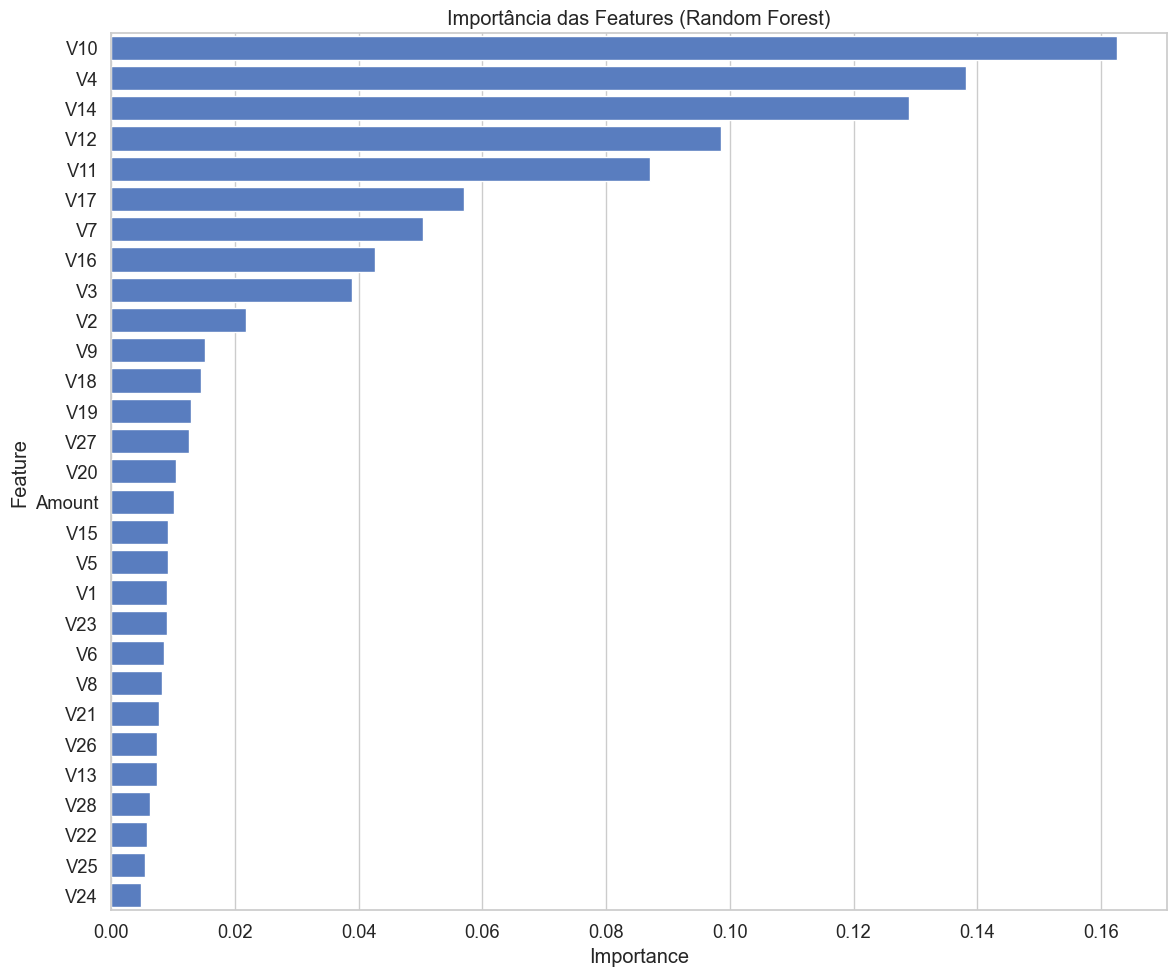

In [4]:
# Treinar um modelo inicial para extrair a importância das features
# class_weight='balanced' ajusta o modelo para o desbalanceamento
model_rf_fs = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf_fs.fit(X_train_scaled, y_train)

# Obter a importância
importances = model_rf_fs.feature_importances_
feature_names = X.columns

# Criar um DataFrame para visualização
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features (Random Forest)')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Gráfico de importância das features salvo como 'feature_importance.png'")
print(feature_importance_df.head(15))

Criar Novos Conjuntos com Features Selecionadas

In [5]:
# Selecionar as 15 features mais importantes
N_FEATURES = 15
top_features = feature_importance_df['Feature'].head(N_FEATURES).tolist()

print(f"As {N_FEATURES} features selecionadas são: \n{top_features}")

# Criar os novos DataFrames com apenas essas features
X_train_fs = X_train_scaled[top_features]
X_test_fs = X_test_scaled[top_features]

As 15 features selecionadas são: 
['V10', 'V4', 'V14', 'V12', 'V11', 'V17', 'V7', 'V16', 'V3', 'V2', 'V9', 'V18', 'V19', 'V27', 'V20']


Treinamento e Avaliação do Modelo 1 (Todas as Features)

--- Avaliação do Modelo 1 (Todas as Features) ---
              precision    recall  f1-score   support

Legítima (0)       0.95      1.00      0.97       380
  Fraude (1)       0.99      0.86      0.92       148

    accuracy                           0.96       528
   macro avg       0.97      0.93      0.95       528
weighted avg       0.96      0.96      0.96       528

Acurácia: 0.9583
Macro Avg F1-Score: 0.9460
Matriz de confusão salva como 'confusion_matrix_all_features.png'


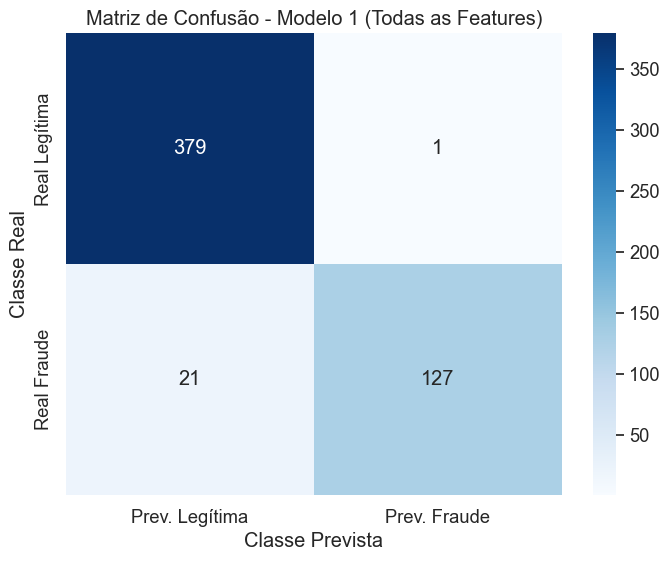

In [6]:
# 1. Treinar o modelo
# Usamos class_weight='balanced' para compensar o desbalanceamento
model_all_features = RandomForestClassifier(random_state=42, class_weight='balanced')
model_all_features.fit(X_train_scaled, y_train)

# 2. Fazer previsões
y_pred_all = model_all_features.predict(X_test_scaled)

# 3. Avaliar o modelo
print("--- Avaliação do Modelo 1 (Todas as Features) ---")
print(classification_report(y_test, y_pred_all, target_names=['Legítima (0)', 'Fraude (1)']))

# Métricas específicas solicitadas
acc_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all, average='macro')
print(f"Acurácia: {acc_all:.4f}")
print(f"Macro Avg F1-Score: {f1_all:.4f}")

# 4. Matriz de Confusão
cm_all = confusion_matrix(y_test, y_pred_all)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prev. Legítima', 'Prev. Fraude'], 
            yticklabels=['Real Legítima', 'Real Fraude'])
plt.title('Matriz de Confusão - Modelo 1 (Todas as Features)')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.savefig('confusion_matrix_all_features.png')
print("Matriz de confusão salva como 'confusion_matrix_all_features.png'")

Treinamento e Avaliação do Modelo 2 (Features Selecionadas)


--- Avaliação do Modelo 2 (Features Selecionadas) ---
              precision    recall  f1-score   support

Legítima (0)       0.95      0.99      0.97       380
  Fraude (1)       0.98      0.86      0.92       148

    accuracy                           0.96       528
   macro avg       0.97      0.93      0.94       528
weighted avg       0.96      0.96      0.96       528

Acurácia: 0.9564
Macro Avg F1-Score: 0.9437
Matriz de confusão salva como 'confusion_matrix_selected_features.png'


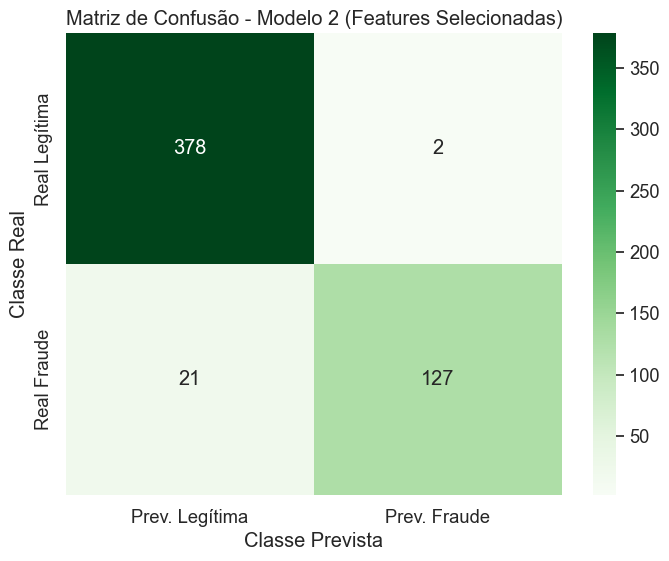

In [7]:
# 1. Treinar o modelo
model_fs = RandomForestClassifier(random_state=42, class_weight='balanced')
model_fs.fit(X_train_fs, y_train)

# 2. Fazer previsões
y_pred_fs = model_fs.predict(X_test_fs)

# 3. Avaliar o modelo
print("\n--- Avaliação do Modelo 2 (Features Selecionadas) ---")
print(classification_report(y_test, y_pred_fs, target_names=['Legítima (0)', 'Fraude (1)']))

# Métricas específicas solicitadas
acc_fs = accuracy_score(y_test, y_pred_fs)
f1_fs = f1_score(y_test, y_pred_fs, average='macro')
print(f"Acurácia: {acc_fs:.4f}")
print(f"Macro Avg F1-Score: {f1_fs:.4f}")

# 4. Matriz de Confusão
cm_fs = confusion_matrix(y_test, y_pred_fs)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_fs, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Prev. Legítima', 'Prev. Fraude'], 
            yticklabels=['Real Legítima', 'Real Fraude'])
plt.title('Matriz de Confusão - Modelo 2 (Features Selecionadas)')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.savefig('confusion_matrix_selected_features.png')
print("Matriz de confusão salva como 'confusion_matrix_selected_features.png'")

Comparação e Análise Final

In [8]:
# Criar um DataFrame para comparar as métricas
comparison_data = {
    'Métrica': ['Acurácia', 'Macro Avg F1-Score'],
    'Modelo 1 (Todas Features)': [acc_all, f1_all],
    'Modelo 2 (Features Selecionadas)': [acc_fs, f1_fs]
}
comparison_df = pd.DataFrame(comparison_data).set_index('Métrica')

print("\n--- Comparação dos Modelos ---")
print(comparison_df)


--- Comparação dos Modelos ---
                    Modelo 1 (Todas Features)  \
Métrica                                         
Acurácia                             0.958333   
Macro Avg F1-Score                   0.946042   

                    Modelo 2 (Features Selecionadas)  
Métrica                                               
Acurácia                                    0.956439  
Macro Avg F1-Score                          0.943721  
